# Demographic insights 

[TIAFI's](https://tiafi.org/) demographic insights notebook aims to help an NGO supporting Syrian refugees in Izmir, Turkey to gather insights on the demographic makeup of those who use its information point service (providing information and assistance to those who struggle with the Turkish language and/or following government guidance). It does this by analyzing service users' nationality, gender and vulnerability type.

## 1) Clean data

### 1.1 Read-in data

In [1]:
# imports libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# reads in the data
people = pd.read_excel('C:/Users/HUAWEI/Desktop/Projects/TIAFI-Data-Analysis/people_data.xlsx')

### 1.2 Clean messy data

In [2]:
# filters out problematic values in the nationality column
people = people[people.nationality!='GAZIANTAP']
people = people[people.nationality!='GAZİANTAP']

# relabels problematic values
people.loc[people.nationality=='TURKİSH', 'nationality'] = 'Turkish'

### 1.3 Get column count function

In [3]:
# gets a count of people by nationality
def get_people_col_count(col):
    grouped_df = people.groupby(col).count().person_id.sort_values()
    nationality = list(grouped_df.index)
    count = list(grouped_df.iloc[range(len(grouped_df))])
    return list([nationality, count])

colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:black', 'tab:brown']

## 2) Analyze data

### 2.1 Gender

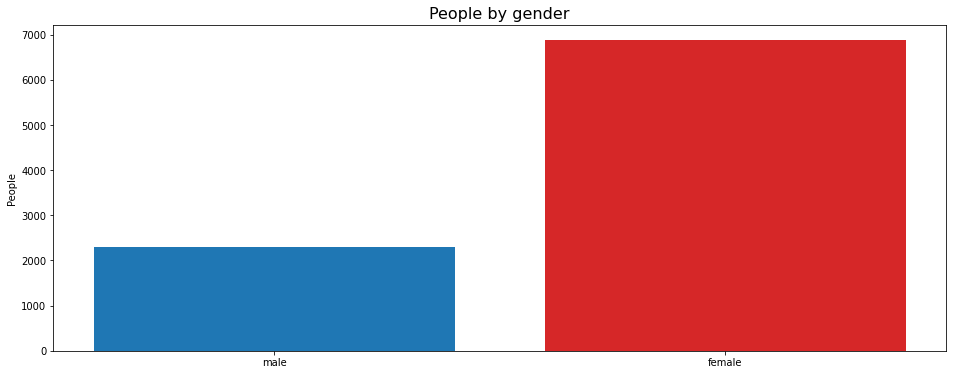

In [4]:
# gets a count of people by gender
people.gender[people.gender.notna()] = [x.lower() for x in people.gender[people.gender.notna()]]
people_gender = get_people_col_count('gender')

# creates a length object so we plot the correct number of colors below
length = len(people_gender[0])

# creates a people by gender plot
graph, plot1 = plt.subplots(1, 1, figsize=(16, 6))
plot1.bar(people_gender[0], people_gender[1], color=colors[0:length]);
plot1.set_title('People by gender', size=16);
plot1.set_ylabel('People');

### 2.2 Nationality

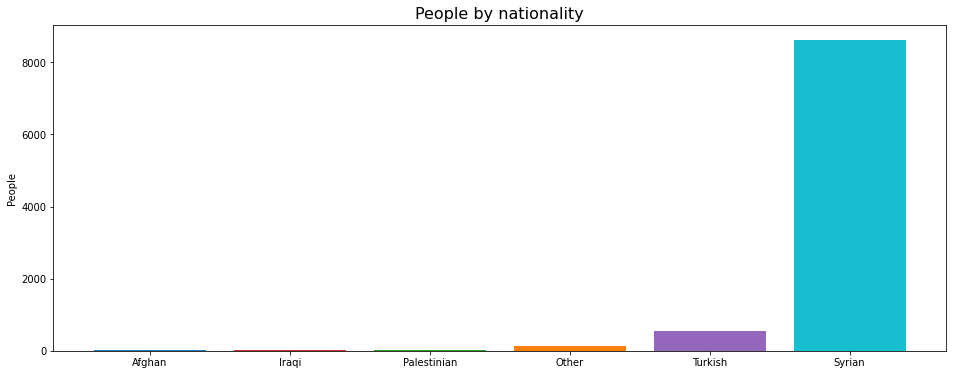

In [5]:
# gets a count of people by nationality
people_nationality = get_people_col_count('nationality')

# creates a length object so we plot the correct number of colors below
length = len(people_nationality[0])

# creates a people by nationality plot
graph, plot1 = plt.subplots(1, 1, figsize=(16, 6))
plot1.bar(people_nationality[0], people_nationality[1], color=colors[0:length]);
plot1.set_title('People by nationality', size=16);
plot1.set_ylabel('People');

### 2.3 Vulnerability

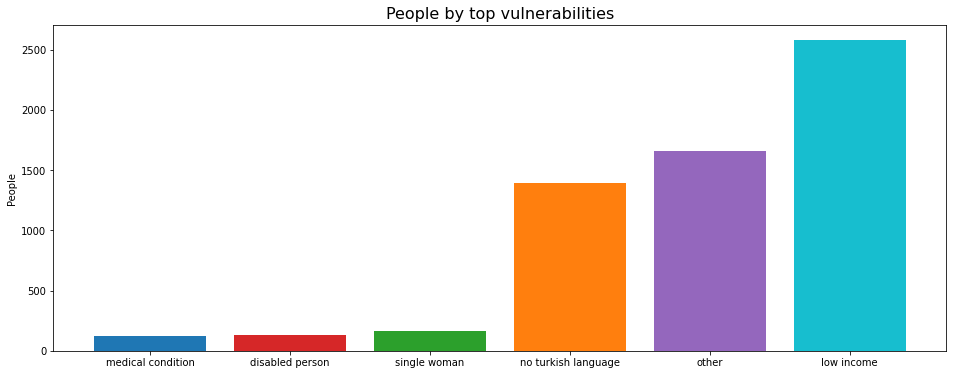

In [6]:
# supresses set with copy warning
pd.options.mode.chained_assignment = None

# renames long vulnerability names (CHANGE AS NEW VULNERABILITIES ARE ADDED AS PD.UNIQUE HAD TO BE USED!)
people.loc[people.vulnerability==pd.unique(people.vulnerability)[1], 'vulnerability'] = 'low income'
people.loc[people.vulnerability==pd.unique(people.vulnerability)[5], 'vulnerability'] = 'medical condition'

# gets a count of people by vulnerability
people.vulnerability[people.vulnerability.notna()] = [x.lower() for x in people.vulnerability[people.vulnerability.notna()]]
people_vulnerability = get_people_col_count('vulnerability')

# creates a people by vulnerability plot
graph, plot1 = plt.subplots(1, 1, figsize=(16, 6))

length = len(people_vulnerability[0])
show_vulnerability = 6

plot1.bar(people_vulnerability[0][length-show_vulnerability:length], people_vulnerability[1][length-show_vulnerability:length], color=colors[0:6]);
plot1.set_title('People by top vulnerabilities', size=16);
plot1.set_ylabel('People');